In [30]:
import numpy as np
import pandas as pd
import os,sys

In [31]:
path_data = os.path.join(os.getcwd(),os.pardir,os.pardir,'data')
data_list = os.listdir(path_data)

In [32]:
bleaching_data_path = os.path.join(path_data,'bleaching')
bleaching_data_file = os.path.join(bleaching_data_path,'global_bleaching_environmental.csv')
bleaching_data = pd.read_csv(bleaching_data_file, encoding='ISO-8859-1')
bleaching_data = bleaching_data[['Date_Year','Latitude_Degrees','Longitude_Degrees','Percent_Bleaching']]
# print(bleaching_data.head())
print(len(bleaching_data))

41361


C:\Users\QWT\AppData\Local\Temp\ipykernel_15272\2683490728.py:3: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  bleaching_data = pd.read_csv(bleaching_data_file, encoding='ISO-8859-1')


In [33]:
start_year = 2008
end_year = 2018
year_filtered_bleaching_data = bleaching_data[(bleaching_data['Date_Year'] >= start_year) & (bleaching_data['Date_Year'] <= end_year)]
lat_min, lat_max = -80, 80
lon_min, lon_max = -180, 180
region_filtered_bleaching_data = year_filtered_bleaching_data[(year_filtered_bleaching_data['Latitude_Degrees'] >= lat_min) & (year_filtered_bleaching_data['Latitude_Degrees'] <= lat_max) & (year_filtered_bleaching_data['Longitude_Degrees'] >= lon_min) & (year_filtered_bleaching_data['Longitude_Degrees'] <= lon_max)]
region_filtered_bleaching_data.loc[:, 'Percent_Bleaching'] = pd.to_numeric(region_filtered_bleaching_data.loc[:, 'Percent_Bleaching'], errors='coerce')
region_filtered_bleaching_data = region_filtered_bleaching_data.dropna(subset=['Percent_Bleaching'])
region_filtered_bleaching_data = region_filtered_bleaching_data[region_filtered_bleaching_data['Percent_Bleaching'] > 0]
print(len(region_filtered_bleaching_data))

7411


In [34]:
import pandas as pd

# Define the bin size for latitude and longitude
lat_bin_size = 5
lon_bin_size = 5

def calculate_bin(value, bin_size):
    bin_center = ((value + bin_size/2) // bin_size) * bin_size
    return bin_center

lat_bins = np.arange(lat_min, lat_max + lat_bin_size, lat_bin_size)
lon_bins = np.arange(lon_min, lon_max + lon_bin_size, lon_bin_size)

# new_data = pd.DataFrame()
# for year in range(start_year, end_year + 1):
#     # Filter the data for the year
#     bleaching_data_year = region_filtered_bleaching_data[region_filtered_bleaching_data['Date_Year'] == year].copy()
    
#     bleaching_data_year.loc[:, 'lat_bin'] = pd.cut(bleaching_data_year['Latitude_Degrees'], bins=lat_bins)
#     bleaching_data_year.loc[:, 'lon_bin'] = pd.cut(bleaching_data_year['Longitude_Degrees'], bins=lon_bins)
#     bleaching_data_year['bleaching_count'] = bleaching_data_year['Percent_Bleaching'] > 0
    
#     # Group by year and bins, then sum the counts of 'bleaching_count'
#     bleaching_counts = bleaching_data_year.groupby(['Date_Year', 'lat_bin', 'lon_bin'])['bleaching_count'].sum().reset_index(name='count')

#     # Add the data to the new DataFrame
#     new_data = pd.concat([new_data, bleaching_counts], ignore_index=True)

# # save the data
# new_data.to_csv(os.path.join(bleaching_data_path,'global_bleaching_environmental_binned.csv'), index=False)

# Bin the data for the entire dataset
region_filtered_bleaching_data['lat_bin'] = pd.cut(region_filtered_bleaching_data['Latitude_Degrees'], bins=lat_bins)
region_filtered_bleaching_data['lon_bin'] = pd.cut(region_filtered_bleaching_data['Longitude_Degrees'], bins=lon_bins)

# Create a column to count occurrences where Percent_Bleaching > 0
region_filtered_bleaching_data['bleaching_count'] = region_filtered_bleaching_data['Percent_Bleaching'] > 0

# Group by latitude and longitude bins, then sum the counts of 'bleaching_count'
bleaching_counts = region_filtered_bleaching_data.groupby(['lat_bin', 'lon_bin'])['bleaching_count'].sum().reset_index(name='count')

# Save the aggregated data
bleaching_counts.to_csv(os.path.join(bleaching_data_path, 'global_bleaching_environmental_binned.csv'), index=False)

# Display a preview of the results
# bleaching_counts.head()


,lat_bin,lon_bin,count
0,"(-80, -75]","(-180, -175]",0
1,"(-80, -75]","(-175, -170]",0
2,"(-80, -75]","(-170, -165]",0
3,"(-80, -75]","(-165, -160]",0
4,"(-80, -75]","(-160, -155]",0


In [ ]:
save_fig_folder = os.path.join(os.getcwd(),os.pardir,'figures')
if not os.path.exists(save_fig_folder):
    os.makedirs(save_fig_folder)

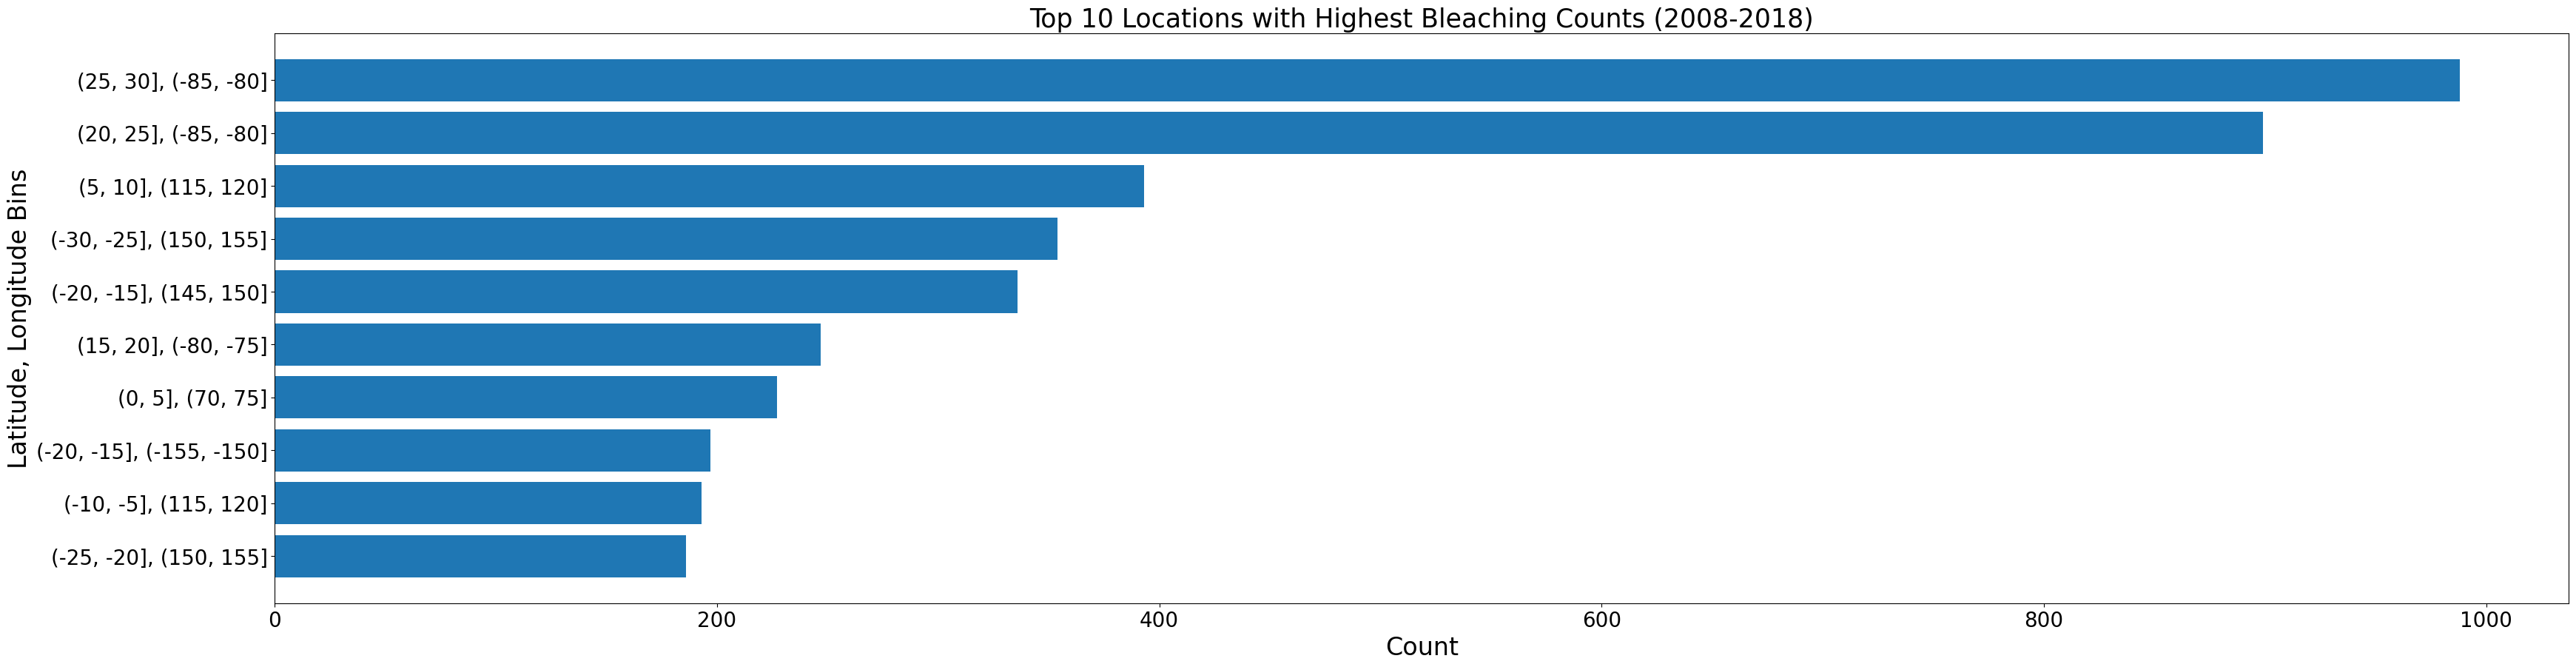

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sort the data by 'count' in descending order and select the top 10
top_bleaching_counts = bleaching_counts.sort_values(by='count', ascending=False).head(10)
fontsize = 24
fontsize_title = 25
# Plotting
plt.figure(figsize=(40, 10))
plt.barh(top_bleaching_counts['lat_bin'].astype(str) + ', ' + top_bleaching_counts['lon_bin'].astype(str), 
         top_bleaching_counts['count'])
plt.xlabel('Count', fontsize=fontsize)
plt.ylabel('Latitude, Longitude Bins', fontsize=fontsize)
plt.title('Top 10 Locations with Highest Bleaching Counts (2008-2018)', fontsize=fontsize_title)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.tick_params(axis='both', which='major', labelsize=20)
filename = 'top_10_locations_with_highest_bleaching_counts.png'
plt.savefig(os.path.join(save_fig_folder,filename))
plt.show()

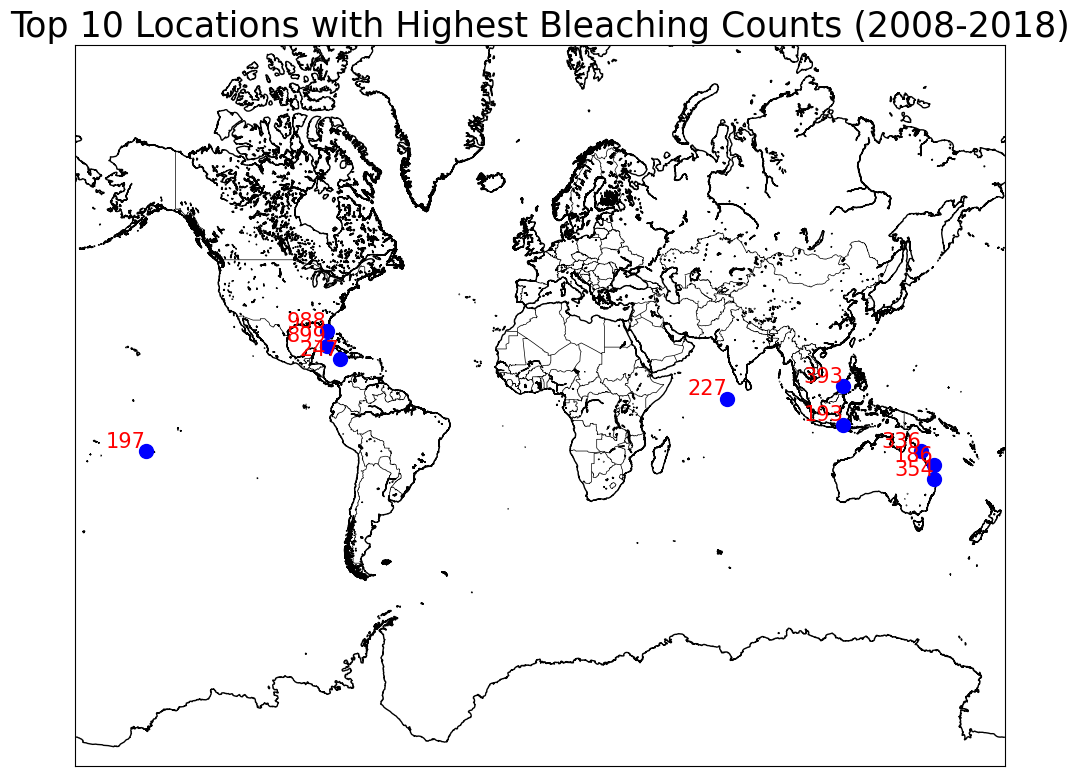

In [42]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Continue from your code
fontsize = 24
fontsize_title = 25

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Create a Basemap instance
m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max, resolution='i', ax=ax)

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Get central points of the top 10 bins
# Assuming 'top_bleaching_counts' is your DataFrame with the top 10 bins
for idx, row in top_bleaching_counts.iterrows():
    lat_center = row['lat_bin'].mid
    lon_center = row['lon_bin'].mid

    # Convert lat and lon to map projection coordinates
    x, y = m(lon_center, lat_center)

    # Plot the point on the map
    m.plot(x, y, color = 'blue', marker='o', markersize=10) 

    # Optionally, you can add a label with the count
    plt.text(x, y, str(row['count']), fontsize=15, ha='right', va='bottom', color='red')

plt.title("Top 10 Locations with Highest Bleaching Counts (2008-2018)", fontsize=fontsize_title)

filename = os.path.join(save_fig_folder,'top10_bleaching_counts.png')
plt.savefig(filename)
plt.show()
